# Autour du Paradoxe de Simpson

Import des bibliothèses Pyhtons

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

## Contexte et objectifs du travail

### Quelques éléments de contexte

En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé mais ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.

### Objectifs du travail

1. Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. Calculez dans chaque groupe (fumeuses/ non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe avec le nombre total de femmes dans ce groupe). Vous pourrez proposer une représentation graphique de ces données et calculer des intervalles de confiance si vous le souhaitez. En quoi ce résultat est-il surprenant ?
2. Reprenez la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera par exemple les classes suivantes: 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans. En quoi ce résultat est-il surprenant ? Arrivez vous à expliquer ce paradoxe ? De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.
3. Afin d'éviter un biais induis par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique. Si on introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans, on peut étudier le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses. Ces régressions vous permettent de conclure ou pas sur la nocivité du tabagisme ? Vous pourrez proposer une représentation graphique de ces régressions (en n'omettant pas les régions de confiance).

## Réponse aux objectifs

Les données sont disponibles sur l'espace gitlab [suivant](https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/blob/master/module3/Practical_session/Subject6_smoking.csv). Elles sont importées directement depuis le lien correspondant dans la variable data_url:

In [2]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false"

Import des données dans Python et vérification que le fichier ne contient pas de ligne vide (ce n'est pas le cas).

In [3]:
raw_data = pd.read_csv(data_url)
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

### Relation décès - tabagisme

Affichage d'un tableau représentant le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme ainsi que le taux de mortalité.

In [4]:
Table_1 = raw_data.groupby('Smoker').Status.value_counts()
print(Table_1)

Smoker  Status
No      Alive     502
        Dead      230
Yes     Alive     443
        Dead      139
Name: Status, dtype: int64


Calcul du taux de mortalité par groupe et affichage des résultats.

In [5]:
Taux_mortalite_fumeur = Table_1.Yes.Dead /(Table_1.Yes.Dead + Table_1.Yes.Alive)
Taux_mortalite_non_fumeur = Table_1.No.Dead/(Table_1.No.Dead + Table_1.No.Alive)
print("Taux_mortalite_fumeur =", Taux_mortalite_fumeur)
print("Taux_mortalite_non_fumeur =", Taux_mortalite_non_fumeur)

Taux_mortalite_fumeur = 0.23883161512027493
Taux_mortalite_non_fumeur = 0.31420765027322406


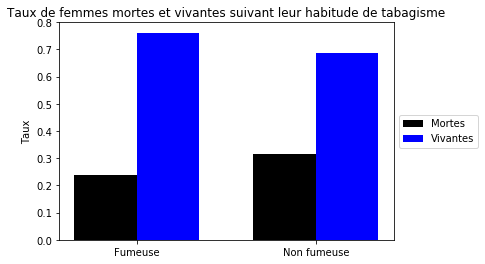

In [6]:
Taux_vivant = [1-Taux_mortalite_fumeur, 1-Taux_mortalite_non_fumeur]
Taux_mort = [Taux_mortalite_fumeur, Taux_mortalite_non_fumeur]
Habitude_tabagisme = ['Fumeuse','Non fumeuse']

width = 0.35
x = np.arange(len(Habitude_tabagisme))

fig, ax = plt.subplots()
ax.bar(x - width/2, Taux_mort, width,label = 'Mortes', color='k')
ax.bar(x + width/2, Taux_vivant, width,label = 'Vivantes', color='b')

ax.set_ylabel('Taux')
ax.set_title('Taux de femmes mortes et vivantes suivant leur habitude de tabagisme')
ax.set_xticks(x)
ax.set_xticklabels(Habitude_tabagisme)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

A première vue ces résultats sont donc contre-intuitifs et indiquent une mortalité plus importantes chez les individus non-fumeuses. L'analyse requiert donc une investigation supplémentaire des données.

### Prise en compte de l'age des individus

Afin d'approfondir l'analyse, prenons en compte l'age des individus en les répatissant en quatre classes d'age : 18-34 ans, 35-54 ans, 55-64 ans, plus de 65 ans. 

Création de la colonne listant les catégories d'age.

In [7]:
Data_cat = raw_data
Classe_age = ["18-34", "35-54", "55-64", "65+"  ]
Data_cat['Cat_age'] = pd.cut(Data_cat.Age, [18, 34, 54, 64, 200],include_lowest = True, labels=Classe_age)

Reprenons l'analyse précédente mais cette fois par classe d'age et non par habitude de tabagisme.

Smoker  Status
No      Alive     502
        Dead      230
Yes     Alive     443
        Dead      139
Name: Status, dtype: int64


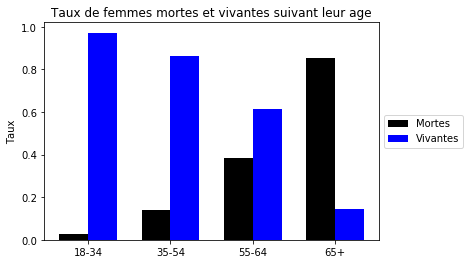

In [8]:
Table_2 = raw_data.groupby('Cat_age').Status.value_counts()
print(Table_1)

Taux_m_clas1 = Table_2['18-34'].Dead /(Table_2['18-34'].Dead + Table_2['18-34'].Alive)
Taux_m_clas2 = Table_2['35-54'].Dead /(Table_2['35-54'].Dead + Table_2['35-54'].Alive)
Taux_m_clas3 = Table_2['55-64'].Dead /(Table_2['55-64'].Dead + Table_2['55-64'].Alive)
Taux_m_clas4 = Table_2['65+'].Dead /(Table_2['65+'].Dead + Table_2['65+'].Alive)

Taux_vivant = [1-Taux_m_clas1, 1-Taux_m_clas2, 1-Taux_m_clas3, 1-Taux_m_clas4]
Taux_mort = [Taux_m_clas1, Taux_m_clas2, Taux_m_clas3, Taux_m_clas4]

width = 0.35
x = np.arange(len(Classe_age))

fig, ax = plt.subplots()
ax.bar(x - width/2, Taux_mort, width,label = 'Mortes', color='k')
ax.bar(x + width/2, Taux_vivant, width,label = 'Vivantes', color='b')

ax.set_ylabel('Taux')
ax.set_title('Taux de femmes mortes et vivantes suivant leur age')
ax.set_xticks(x)
ax.set_xticklabels(Classe_age)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


Or, il apparait que les individus "fumeuses" de l'échantillon sont plus jeunes que les "non-fumeuses". Les moyennes d'age pour chaque groupe sont en effet de:

In [9]:
Moyenne_age = raw_data.groupby('Smoker').mean()
print(Moyenne_age)

              Age
Smoker           
No      49.815847
Yes     44.269759


Avec un écart type de :

In [10]:
Std_age = raw_data.groupby('Smoker').std()
print(Std_age)

              Age
Smoker           
No      20.898294
Yes     16.217886


Visualisons la répartition en classe d'age par habitude de tabagisme.

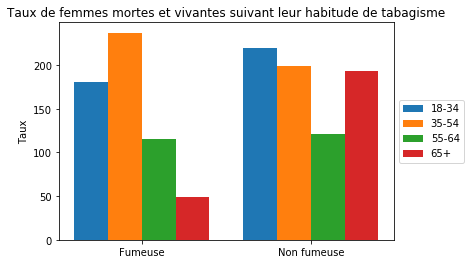

In [11]:
Table_2 = raw_data.groupby('Smoker').Cat_age.value_counts()
Habitude_tabagisme = ['Fumeuse','Non fumeuse']
Clas_1 = [Table_2.Yes['18-34'], Table_2.No['18-34']]
Clas_2 = [Table_2.Yes['35-54'], Table_2.No['35-54']]
Clas_3 = [Table_2.Yes['55-64'], Table_2.No['55-64']]
Clas_4 = [Table_2.Yes['65+'], Table_2.No['65+']]

width = 0.2
x = np.arange(len(Habitude_tabagisme))

fig, ax = plt.subplots()
ax.bar(x - 3*width/2, Clas_1, width,label = '18-34')
ax.bar(x - width/2, Clas_2, width,label = '35-54')
ax.bar(x + width/2, Clas_3, width,label = '55-64')
ax.bar(x + 3*width/2, Clas_4, width,label = '65+')

ax.set_ylabel('Taux')
ax.set_title('Taux de femmes mortes et vivantes suivant leur habitude de tabagisme')
ax.set_xticks(x)
ax.set_xticklabels(Habitude_tabagisme)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


Cete analyse complémentaire semble ainsi montrer que la surmortalité chez les non-fumeuse est avant tout liée à une suresprésentation des catégories d'age plus élevée, le taux de mortalité étant fortement lié à l'age.

### Utilisation d'une regression logistique

Afin d'éviter un biais induis par des regroupements en tranches d'âges arbitraires et non régulières, utilisons une regresion logistique. 

Une variable Death qui vaut 0 ou 1 suivant que l'individu est décédé ou non est introduite.

Text(0.5,1,'Regression logistique - Death vs Age')

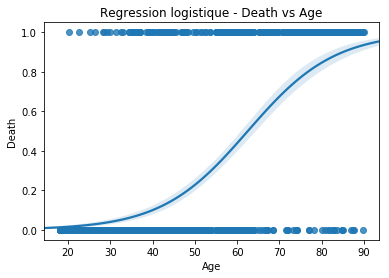

In [16]:
Data_deat = raw_data
Data_deat['Death'] = np.where(Data_deat['Status'] == 'Alive', 0, 1)

sns.regplot(x= Data_deat.Age, y= Data_deat.Death, logistic= True).set_title("Regression logistique - Death vs Age")

Cette regression logistique confirme bien la forte dépendance entre age et taux de mortalité.